# EdNet-KT1 Data Analysis

## Columns Description

|  Field   | Annotation  |
|  ----  | ----  |
| user_id  | student's id |
| timestamp  |  the moment the question was given, represented as Unix timestamp in milliseconds |
| solving_id  | represents each learning session of students corresponds to each bunle. It is a form of single integer, starting from 1 |
| question_id  | the ID of the question that given to student, which is a form of q{integer} |
| user_answer  | the answer that the student submitted, recorded as a character between a and d inclusively |
| elapsed_time  | the time that the students spends on each question in milliseconds |

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

## Record Example
We randomly selected 5000 tables from all the students for analysis, and added a column named "user_id" to the original table

In [2]:
import os
path=r'D:\EdNet-KT1\KT1'
d=[]
table_list=[]
s=pd.Series(os.listdir(path))
file_selected=s.sample(5000).to_numpy()
for file_name in file_selected:
    data_raw=pd.read_csv(path+'\\'+file_name,encoding = "ISO-8859-15")
    data_raw['user_id']=pd.Series([file_name[:-4]]*len(data_raw))
    d.append([file_name[:-4],len(data_raw)])
    data=pd.DataFrame(data_raw,columns=['user_id']+data_raw.columns.to_list()[:-1])
    table_list.append(data)
df=pd.concat(table_list)
pd.set_option('display.max_rows',10)
df=df.reset_index(drop=True)
df

,user_id,timestamp,solving_id,question_id,user_answer,elapsed_time
0,u717875,1565332027449,1,q4862,d,45000
1,u717875,1565332057492,2,q6747,d,24000
2,u717875,1565332085743,3,q326,c,25000
3,u717875,1565332116475,4,q6168,a,27000
4,u717875,1565332137148,5,q847,a,17000
...,...,...,...,...,...,...
574251,u177603,1530371808931,15,q6984,b,44250
574252,u177603,1530372197614,16,q7335,c,95750
574253,u177603,1530372198181,16,q7336,a,95750
574254,u177603,1530372198879,16,q7337,c,95750


## General Feature

In [3]:
df.describe()

,timestamp,solving_id,elapsed_time
count,5.742560e+05,574256.000000,5.742560e+05
mean,1.546425e+12,875.902859,2.599017e+04
std,2.019656e+10,1941.978009,3.376126e+04
min,1.494451e+12,1.000000,0.000000e+00
25%,1.531720e+12,77.000000,1.600000e+04
50%,1.548410e+12,311.000000,2.100000e+04
75%,1.564817e+12,900.000000,3.000000e+04
max,1.575306e+12,18039.000000,7.650000e+06


In [4]:
len(df.question_id.unique())

11838

## Missing Value

In [5]:
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))

Part of missing values for every column
user_id         0.000000
timestamp       0.000000
solving_id      0.000000
question_id     0.000000
user_answer     0.000556
elapsed_time    0.000000
dtype: float64


In [6]:
df.fillna('not choose',inplace=True)

## Sort user_id

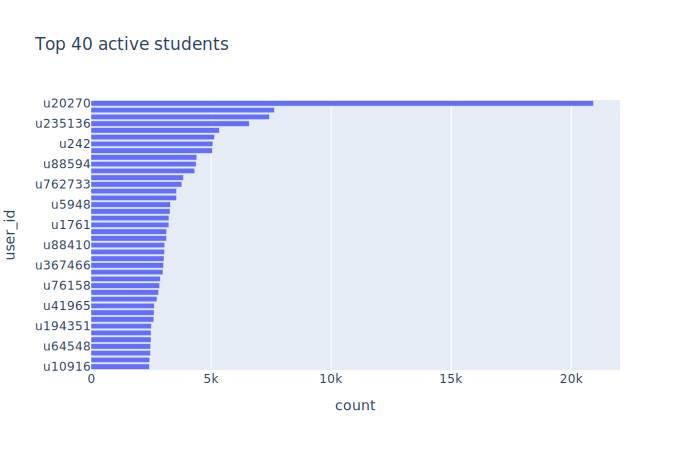

In [7]:
user_count_table=pd.DataFrame(d,columns=['user_id','count'])
ds=user_count_table.sort_values(by=['count'],axis=0).tail(40)
fig = px.bar(
    ds,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 40 active students'
)

fig.show("svg")

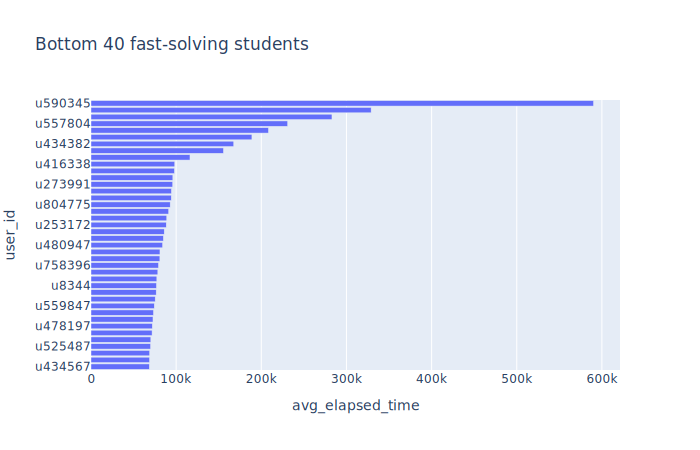

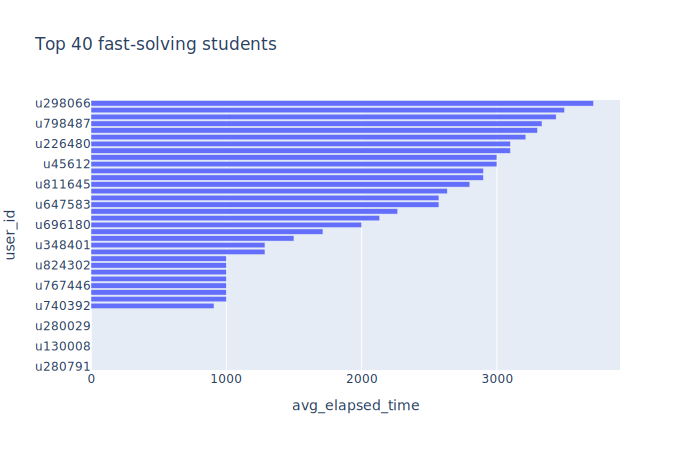

In [8]:
ds=df.loc[:,['user_id','elapsed_time']].groupby('user_id').mean()
ds=ds.reset_index(drop=False)
ds.columns=['user_id','avg_elapsed_time']
ds_tail=ds.sort_values(by=['avg_elapsed_time'],axis=0).tail(40)

fig_tail = px.bar(
    ds_tail,
    x = 'avg_elapsed_time',
    y = 'user_id',
    orientation='h',
    title='Bottom 40 fast-solving students '
)
fig_tail.show("svg")
ds_head=ds.sort_values(by=['avg_elapsed_time'],axis=0).head(40)
fig_head = px.bar(
    ds_head,
    x = 'avg_elapsed_time',
    y = 'user_id',
    orientation='h',
    title='Top 40 fast-solving students'
)
fig_head.show("svg")

Note that some students spend very little time doing the questions, and the time is almost zero. We can almost judge that these students did not do the questions at all, and they chose blindly. We remove these students and rearrange them

In [9]:
bound=5000 # If the average time of doing the topic is less than 5000, it means that the student is most likely to be bad
ds=df.loc[:,['user_id','elapsed_time']].groupby('user_id').mean()
ds=ds.reset_index(drop=False)
ds.columns=['user_id','avg_elapsed_time']
bad_user_ids=ds[ds['avg_elapsed_time']<bound]['user_id'].to_list()
df_drop=df.drop(df[df['user_id'].isin(bad_user_ids)].index)
print('bad students number is ',len(bad_user_ids))
print('length of table after dropping is ',len(df_drop))

bad students number is  61
length of table after dropping is  567778


### After dropping

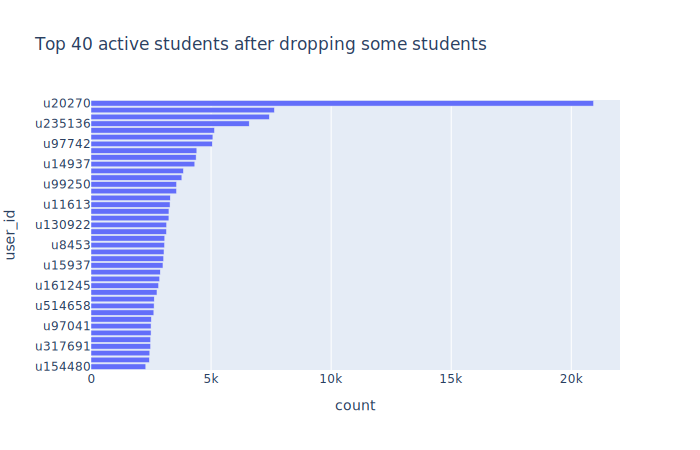

In [10]:
ds=df_drop['user_id'].value_counts().reset_index(drop=False)
ds.columns=['user_id','count']
ds_tail=ds.sort_values(by=['count'],axis=0).tail(40)
fig_tail = px.bar(
    ds_tail,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 40 active students after dropping some students'
)
fig_tail.show("svg")

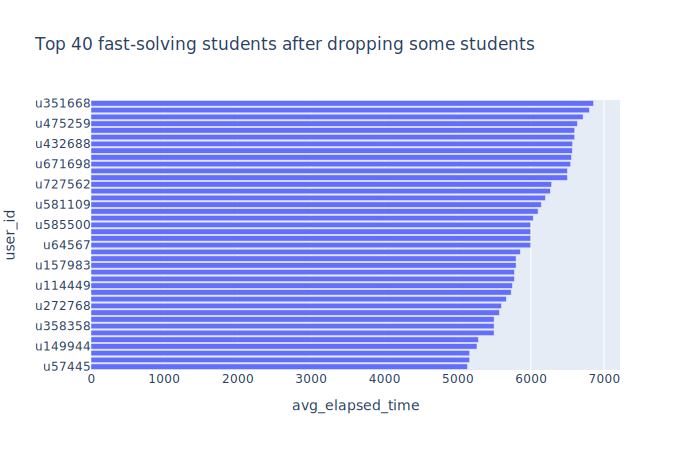

In [11]:
ds=df_drop.loc[:,['user_id','elapsed_time']].groupby('user_id').mean()
ds=ds.reset_index(drop=False)
ds.columns=['user_id','avg_elapsed_time']

ds_head=ds.sort_values(by=['avg_elapsed_time'],axis=0).head(40)
fig_head = px.bar(
    ds_head,
    x = 'avg_elapsed_time',
    y = 'user_id',
    orientation='h',
    title='Top 40 fast-solving students after dropping some students'
)
fig_head.show("svg")

## Sort question_id

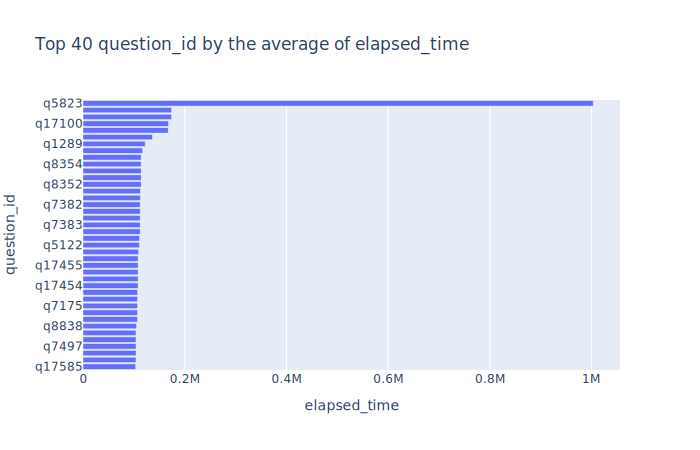

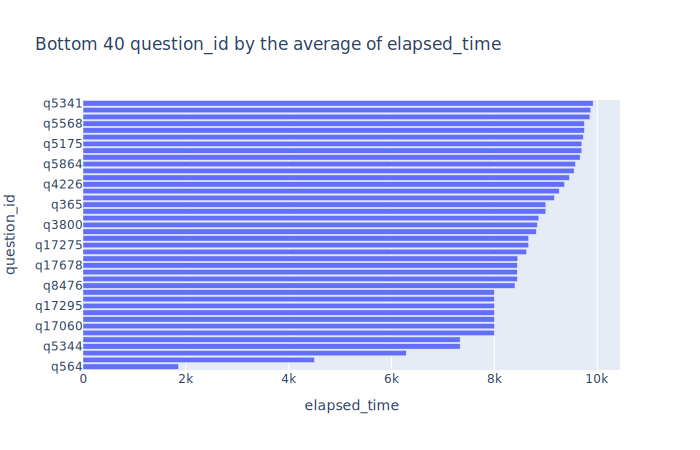

In [12]:
ds=df.loc[:,['question_id','elapsed_time']].groupby('question_id').mean()
ds=ds.reset_index(drop=False)
ds_tail=ds.sort_values(by=['elapsed_time'],axis=0).tail(40)
fig_tail = px.bar(
    ds_tail,
    x = 'elapsed_time',
    y = 'question_id',
    orientation='h',
    title='Top 40 question_id by the average of elapsed_time'
)
fig_tail.show("svg")
ds_head=ds.sort_values(by=['elapsed_time'],axis=0).head(40)
fig_head = px.bar(
    ds_head,
    x = 'elapsed_time',
    y = 'question_id',
    orientation='h',
    title='Bottom 40 question_id by the average of elapsed_time'
)
fig_head.show("svg")

This figure reflects the difficulty of the questions and shows the ids of the 40 most difficult and 40 easiest questions

## Appearence of Questions

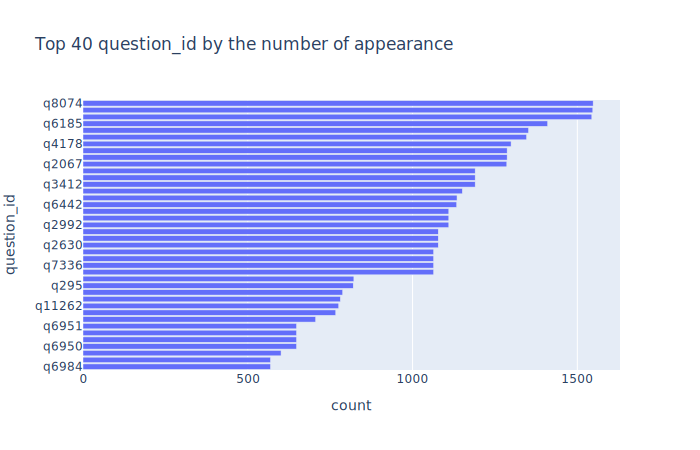

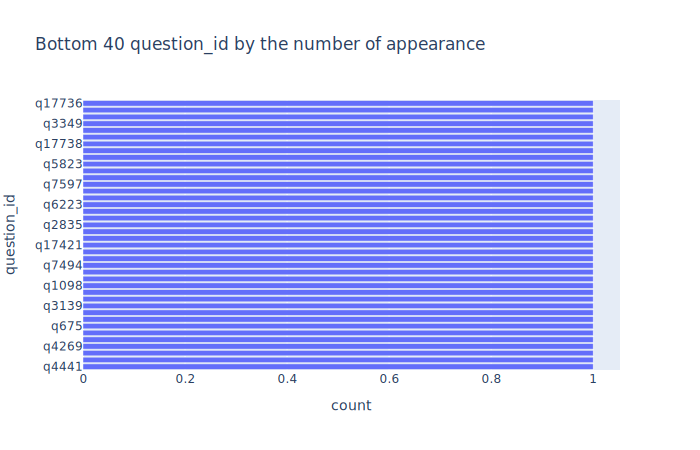

In [13]:
ds=df['question_id'].value_counts().reset_index(drop=False)
ds.columns=['question_id','count']
ds_tail=ds.sort_values(by=['count'],axis=0).tail(40)
fig_tail = px.bar(
    ds_tail,
    x = 'count',
    y = 'question_id',
    orientation='h',
    title='Top 40 question_id by the number of appearance'
)
fig_tail.show("svg")
ds_head=ds.sort_values(by=['count'],axis=0).head(40)
fig_head = px.bar(
    ds_head,
    x = 'count',
    y = 'question_id',
    orientation='h',
    title='Bottom 40 question_id by the number of appearance'
)
fig_head.show("svg")

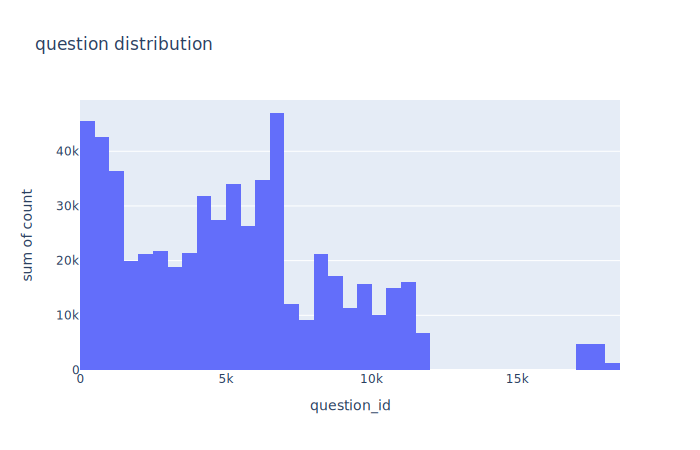

In [14]:
ds2=df['question_id'].value_counts().reset_index(drop=False)
ds2.columns=['question_id','count']
def convert_id2int(x):
    return pd.Series(map(lambda t:int(t[1:]),x))  
ds2['question_id']=convert_id2int(ds2['question_id'])
ds2.sort_values(by=['question_id'])
fig = px.histogram(
    ds2,
    x = 'question_id',
    y = 'count',
    title='question distribution'
)
fig.show("svg")

##  Question's Option Selected Most Frequently

In [15]:
ds=df.loc[:,['question_id','user_answer','user_id']].groupby(['question_id','user_answer']).count()

most_count_dict={}
for id in df.question_id.unique():
    most_count=ds.loc[id].apply(lambda x:x.max())[0]
    most_count_dict[id]=most_count
ds2=ds.apply(lambda x:x-most_count_dict[x.name[0]],axis=1)
ds2=ds2[ds2.user_id==0]
ds2=ds2.reset_index(drop=False).loc[:,['question_id','user_answer']]
ds2.columns=['question_id','most_answer']
ds2.index=ds2['question_id']
ds2['most_answer']

question_id
q1        b
q10       d
q100      c
q1000     c
q10000    b
         ..
q9995     d
q9996     a
q9997     d
q9998     a
q9999     b
Name: most_answer, Length: 12215, dtype: object

Note that if there are multiple options for a question to be selected most frequently, the table will also contain them

## Choices Distribution

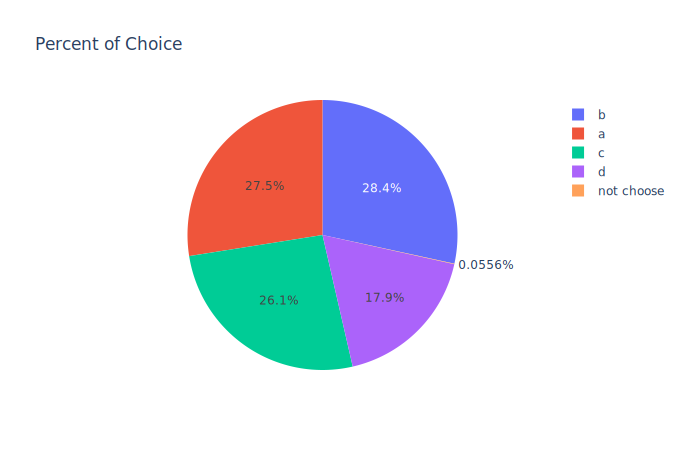

In [16]:
ds = df['user_answer'].value_counts().reset_index(drop=False)
ds.columns = ['user_answer', 'percent']

ds['percent']=ds['percent']/len(df)
ds = ds.sort_values(by=['percent'])

fig = px.pie(
    ds,
    names = ds['user_answer'],
    values = 'percent',
    title = 'Percent of Choice'    
)

fig.show("svg")

## Sort By Time Stamp

In [17]:
import time
import datetime

In [18]:
df_time=df.copy()
columns=df.columns.to_list()
columns[1]='time'
df_time.columns=columns
df_time['time'] /= 1000
df_time['time']=pd.Series(map(datetime.datetime.fromtimestamp,df_time['time']))
df_time

,user_id,time,solving_id,question_id,user_answer,elapsed_time
0,u717875,2019-08-09 14:27:07.449,1,q4862,d,45000
1,u717875,2019-08-09 14:27:37.492,2,q6747,d,24000
2,u717875,2019-08-09 14:28:05.743,3,q326,c,25000
3,u717875,2019-08-09 14:28:36.475,4,q6168,a,27000
4,u717875,2019-08-09 14:28:57.148,5,q847,a,17000
...,...,...,...,...,...,...
574251,u177603,2018-06-30 23:16:48.931,15,q6984,b,44250
574252,u177603,2018-06-30 23:23:17.614,16,q7335,c,95750
574253,u177603,2018-06-30 23:23:18.181,16,q7336,a,95750
574254,u177603,2018-06-30 23:23:18.879,16,q7337,c,95750


### question distribution by time

In [19]:
ds_time_question=df_time.loc[:,['time','question_id']]
ds_time_question=ds_time_question.sort_values(by=['time'])
ds_time_question

,time,question_id
503014,2017-05-11 05:17:10.922,q129
503015,2017-05-11 05:17:34.561,q8058
503016,2017-05-11 05:17:56.806,q8120
503017,2017-05-11 05:18:22.591,q157
503018,2017-05-11 05:18:43.085,q52
...,...,...
108215,2019-12-03 00:48:27.437,q776
108216,2019-12-03 00:59:38.437,q10847
108217,2019-12-03 00:59:38.437,q10844
108218,2019-12-03 00:59:38.437,q10845


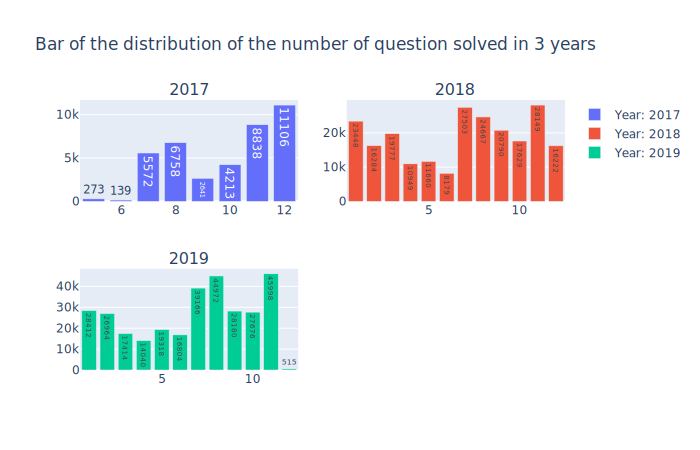

In [20]:
ds_time_question['year']=pd.Series(map(lambda x :x.year,ds_time_question['time']))
ds_time_question['month']=pd.Series(map(lambda x :x.month,ds_time_question['time']))
ds=ds_time_question.loc[:,['year','month']].value_counts()

years=ds_time_question['year'].unique()
years.sort()
fig=make_subplots(
    rows=2,
    cols=2,
    start_cell='top-left',
    subplot_titles=tuple(map(str,years))
)
traces=[
    go.Bar(
        x=ds[year].reset_index().sort_values(by=['month'],axis=0)['month'].to_list(),
        y=ds[year].reset_index().sort_values(by=['month'],axis=0)[0].to_list(),
        name='Year: '+str(year),
        text=[ds[year][month] for month in ds[year].reset_index().sort_values(by=['month'],axis=0)['month'].to_list()],
        textposition='auto'
    ) for year in years
]
for i in range(len(traces)):
    fig.append_trace(traces[i],(i//2)+1,(i%2)+1)

fig.update_layout(title_text='Bar of the distribution of the number of question solved in {} years'.format(len(traces)))
fig.show('svg')

### user distribution by time

In [21]:
ds_time_user=df_time.loc[:,['user_id','time']]
ds_time_user=ds_time_user.sort_values(by=['time'])
ds_time_user

,user_id,time
503014,u21056,2017-05-11 05:17:10.922
503015,u21056,2017-05-11 05:17:34.561
503016,u21056,2017-05-11 05:17:56.806
503017,u21056,2017-05-11 05:18:22.591
503018,u21056,2017-05-11 05:18:43.085
...,...,...
108215,u9476,2019-12-03 00:48:27.437
108216,u9476,2019-12-03 00:59:38.437
108217,u9476,2019-12-03 00:59:38.437
108218,u9476,2019-12-03 00:59:38.437


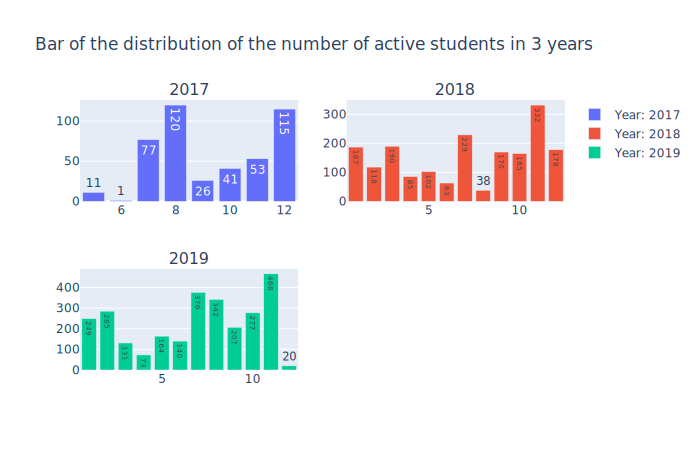

In [22]:
ds_time_user=df_time.loc[:,['user_id','time']]
ds_time_user=ds_time_user.sort_values(by=['time'])
ds_time_user['year']=pd.Series(map(lambda x :x.year,ds_time_user['time']))
ds_time_user['month']=pd.Series(map(lambda x :x.month,ds_time_user['time']))
ds_time_user.drop(['time'],axis=1,inplace=True)
ds=ds_time_user.groupby(['year','month']).nunique()

years=ds_time_user['year'].unique()
years.sort()
fig=make_subplots(
    rows=2,
    cols=2,
    start_cell='top-left',
    subplot_titles=tuple(map(str,years))
)
traces=[
    go.Bar(
        x=ds.loc[year].reset_index()['month'].to_list(),
        y=ds.loc[year].reset_index()['user_id'].to_list(),
        name='Year: '+str(year),
        text=[ds.loc[year].loc[month,'user_id'] for month in ds.loc[year].reset_index()['month'].to_list()],
        textposition='auto'
    ) for year in years
]
for i in range(len(traces)):
    fig.append_trace(traces[i],(i//2)+1,(i%2)+1)

fig.update_layout(title_text='Bar of the distribution of the number of active students in {} years'.format(len(traces)))
fig.show('svg')

Note that the number of students is not repeated here